# Identification
Please indicate your name

Student 1: Erisa KOHANSAL 28708160

Student 2: Sama SATARIYAN 21318843

# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))
sonrot2 = np.array(Image.open('img/sonrot2.png'))

## Exercise: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(If)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(np.abs(fftshift(If)) + 1)

def threshold(I, s):
    return np.where(I<=s, 0, 255)


2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

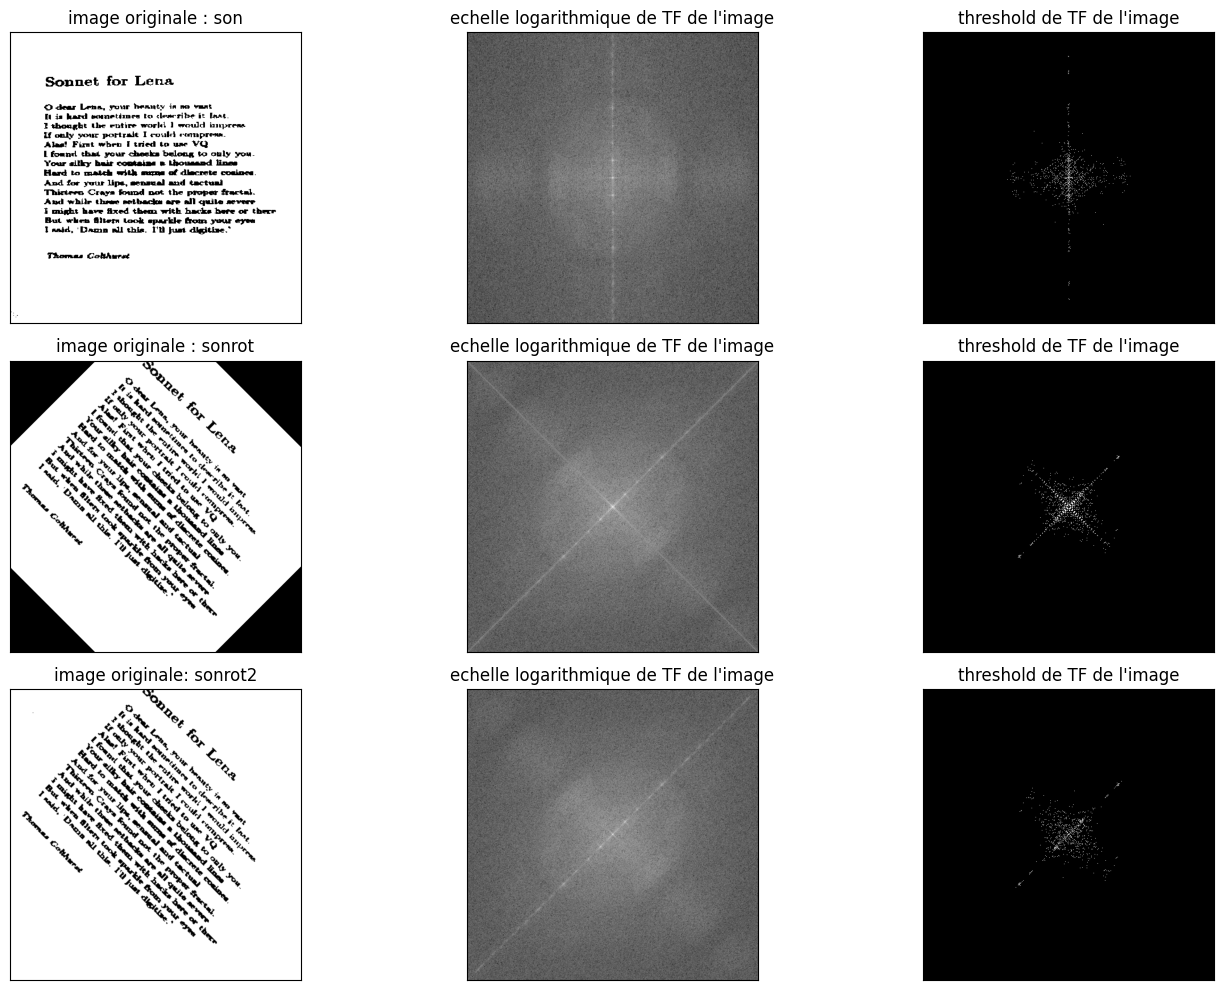

valeurs min=((-3284997.6637136545-900254.5567233725j)) et max=((60682860+0j)) de FT de son
valeurs min=(4.087508176738425) et max=(17.921171860311375) de log de FT de son


In [13]:
import matplotlib.pyplot as plt

# your code below
thresh = 10**5
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sonFT = computeFT(son)
sonShift = toVisualizeFT(sonFT)
sonLog = toVisualizeLogFT(sonFT)
sonThresh = threshold(sonShift, thresh)
ax[0, 0].imshow(son, cmap="gray")
ax[0, 0].set_title("image originale : son")
ax[0, 0].set_xticks(())
ax[0, 0].set_yticks(())

ax[0, 1].imshow(sonLog, cmap="gray")
ax[0, 1].set_title("echelle logarithmique de TF de l'image")
ax[0, 1].set_xticks(())
ax[0, 1].set_yticks(())

ax[0, 2].imshow(sonThresh, cmap="gray")
ax[0, 2].set_title("threshold de TF de l'image")
ax[0, 2].set_xticks(())
ax[0, 2].set_yticks(())

sonrotFT = computeFT(sonrot)
sonrotLog = toVisualizeLogFT(sonrotFT)
sonrotThresh = threshold(toVisualizeFT(sonrotFT), thresh)
ax[1, 0].imshow(sonrot, cmap="gray")
ax[1, 0].set_title("image originale : sonrot")
ax[1, 0].set_xticks(())
ax[1, 0].set_yticks(())

ax[1, 1].imshow(sonrotLog, cmap="gray")
ax[1, 1].set_title("echelle logarithmique de TF de l'image")
ax[1, 1].set_xticks(())
ax[1, 1].set_yticks(())

ax[1, 2].imshow(sonrotThresh, cmap="gray")
ax[1, 2].set_title("threshold de TF de l'image")
ax[1, 2].set_xticks(())
ax[1, 2].set_yticks(())

sonrot2FT = computeFT(sonrot2)
sonrot2Log = toVisualizeLogFT(sonrot2FT)
sonrot2Thresh = threshold(toVisualizeFT(sonrot2FT), thresh)
ax[2, 0].imshow(sonrot2, cmap="gray")
ax[2, 0].set_title("image originale: sonrot2")
ax[2, 0].set_xticks(())
ax[2, 0].set_yticks(())

ax[2, 1].imshow(sonrot2Log, cmap="gray")
ax[2, 1].set_title("echelle logarithmique de TF de l'image")
ax[2, 1].set_xticks(())
ax[2, 1].set_yticks(())

ax[2, 2].imshow(sonrot2Thresh, cmap="gray")
ax[2, 2].set_title("threshold de TF de l'image")
ax[2, 2].set_xticks(())
ax[2, 2].set_yticks(())

fig.tight_layout()
plt.show()

print(f"valeurs min=({sonShift.min()}) et max=({sonShift.max()}) de FT de son")
print(f"valeurs min=({sonLog.min()}) et max=({sonLog.max()}) de log de FT de son")

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

Ces images nous permettent d'observer plusieurs choses : 
- Les fréquences basses contiennent des informations sur les grandes structures et les variations lentes de l'image.
- Les fréquences hautes contiennent des informations sur les contours et les petites structures où il y a un rapide changement d'intensité.
- On observe que les valeurs du spectre se trouvent dans le plan complexe.
- L'échelle logarithmique permet de diminuer le contraste de la transformée de Fourier tout en rendant les faibles fréquences plus visibles.
- Une rotation dans le domaine spatial entraîne la même rotation dans le domaine fréquentiel(cf. le cours), comme on peut l'observer dans le cas de 'son', 'sonrot' et 'sonrot2', où 'sonrot' et 'sonrot2' sont deux rotations de 'son', l'une entraînant une perte d'information par des pixels noirs et l'autre par des pixels blancs.
- Sur le spectre de 'sonrot', on voit apparaître une ligne horizontale. En comparant cela avec les deux autres images, on remarque que cette ligne est due à la perte d'information (les pixels noirs sur les bords de l'image) survenue lors de la rotation de 'son' pour obtenir 'sonrot'. Cette ligne horizontale n'est pas présente dans le spectre de 'sonrot2', ce qui confirme cette observation, car 'sonrot2' est une rotation de 'son' où la perte d'information a été remplacée par des pixels blancs.
- En seuillant la transformée de Fourier à $10^5$, on ne garde que les fréquences les plus élevées.
- De plus, on remarque qu'il y a une ligne verticale au centre du spectre. Cette ligne représente les lignes de texte de l'image.


4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [4]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha * I1 + (1-alpha) * I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

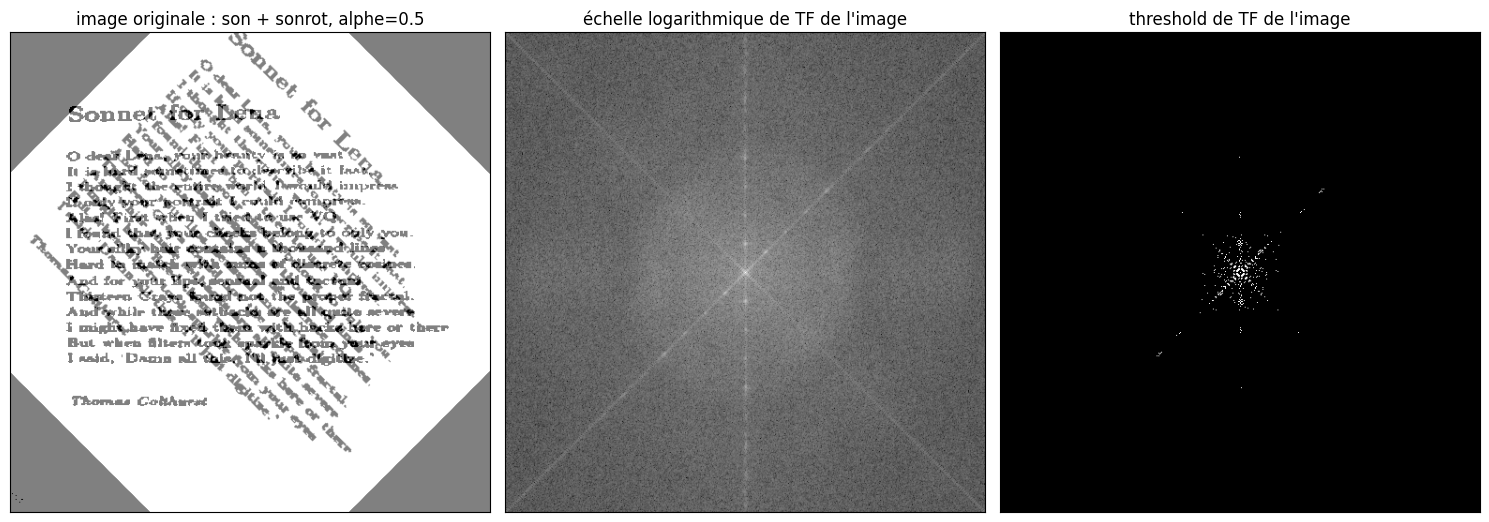

In [5]:
thresh = 10**5
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

img = blend(son, sonrot, 1/2)
imgFT = computeFT(img)
imgLog = toVisualizeLogFT(imgFT)
imgThresh = threshold(toVisualizeFT(imgFT), thresh)
ax[0].imshow(img, cmap="gray")
ax[0].set_title("image originale : son + sonrot, alphe=0.5")
ax[0].set_xticks(())
ax[0].set_yticks(())

ax[1].imshow(imgLog, cmap="gray")
ax[1].set_title("échelle logarithmique de TF de l'image")
ax[1].set_xticks(())
ax[1].set_yticks(())

ax[2].imshow(imgThresh, cmap="gray")
ax[2].set_title("threshold de TF de l'image")
ax[2].set_xticks(())
ax[2].set_yticks(())

fig.tight_layout()
plt.show()

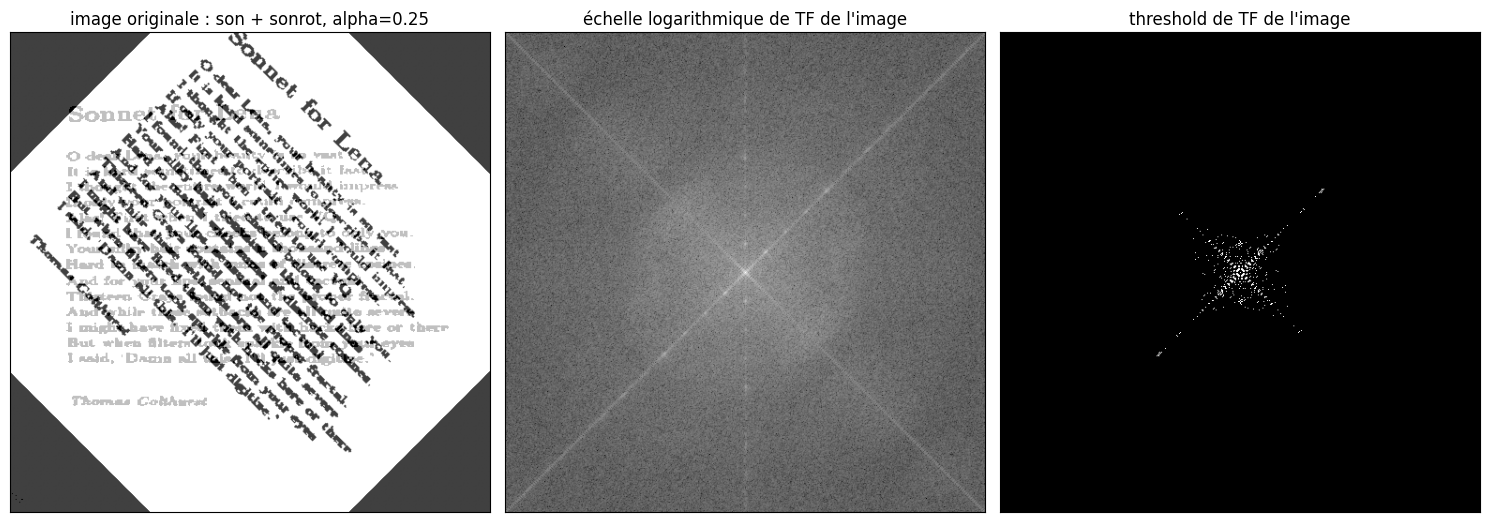

In [6]:
thresh = 10**5
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

img = blend(son, sonrot, 0.25)
imgFT = computeFT(img)
imgLog = toVisualizeLogFT(imgFT)
imgThresh = threshold(toVisualizeFT(imgFT), thresh)
ax[0].imshow(img, cmap="gray")
ax[0].set_title("image originale : son + sonrot, alpha=0.25")
ax[0].set_xticks(())
ax[0].set_yticks(())

ax[1].imshow(imgLog, cmap="gray")
ax[1].set_title("échelle logarithmique de TF de l'image")
ax[1].set_xticks(())
ax[1].set_yticks(())

ax[2].imshow(imgThresh, cmap="gray")
ax[2].set_title("threshold de TF de l'image")
ax[2].set_xticks(())
ax[2].set_yticks(())

fig.tight_layout()
plt.show()

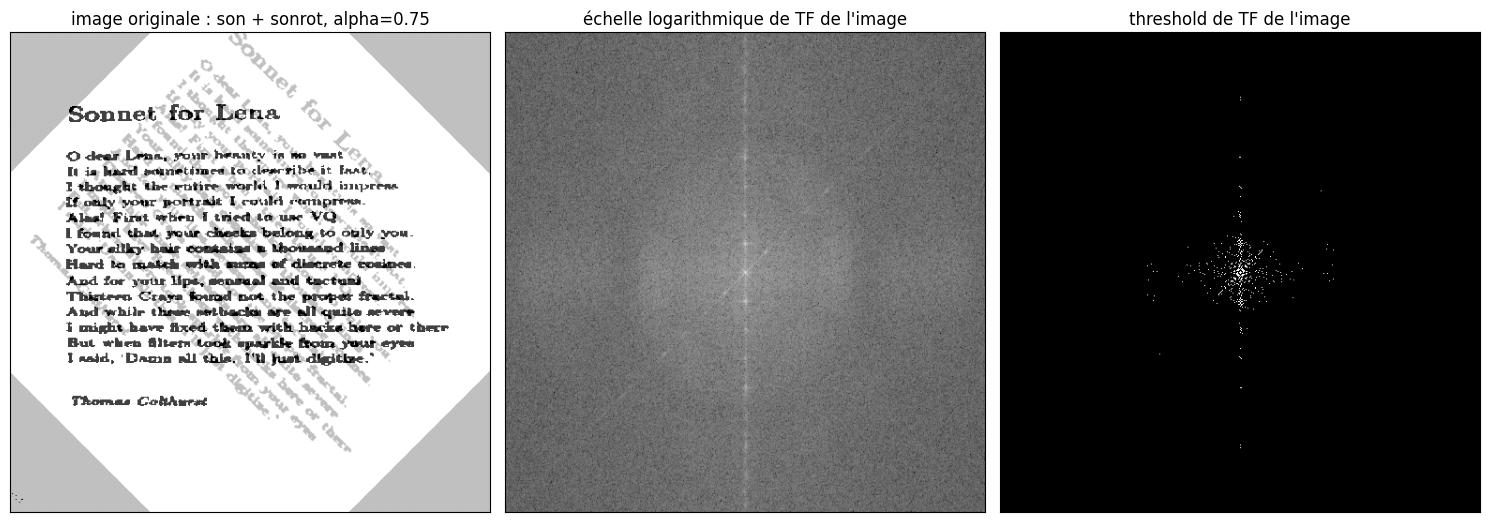

In [7]:
thresh = 10**5
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

img = blend(son, sonrot, 0.75)
imgFT = computeFT(img)
imgLog = toVisualizeLogFT(imgFT)
imgThresh = threshold(toVisualizeFT(imgFT), thresh)
ax[0].imshow(img, cmap="gray")
ax[0].set_title("image originale : son + sonrot, alpha=0.75")
ax[0].set_xticks(())
ax[0].set_yticks(())

ax[1].imshow(imgLog, cmap="gray")
ax[1].set_title("échelle logarithmique de TF de l'image")
ax[1].set_xticks(())
ax[1].set_yticks(())

ax[2].imshow(imgThresh, cmap="gray")
ax[2].set_title("threshold de TF de l'image")
ax[2].set_xticks(())
ax[2].set_yticks(())

fig.tight_layout()
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

D'après la propriété de linéarité de la transformée de Fourier(cf. le cours): 

$TF[ax(t)+by(t)] = aX(f)+bY(f)$

En remplacant $a$ avec $\alpha$ et $b$ avec $1-\alpha$, on a alors : $TF[\alpha x(t) + (1-\alpha) y(t)] = \alpha X(f) + (1-\alpha) Y(f)$
 
Le coefficient $\alpha$ détermine le rapport de visibilité des deux images. Dans le cas où $\alpha=0.5$, les deux images ont le même poids dans l'image résultante, et la transformée de Fourier de cette image résultante est égale à la somme des transformées de Fourier des deux images.

Ainsi, la transformée de Fourier de la somme de deux images est effectivement égale à la somme des transformées de Fourier de ces deux images (propriété de linéarité).
Nous verrons dans les autres tests que lorsque nous changeons la valeur de $\alpha$, la contribution de chaque image dans l'image finale change, ainsi que la contribution de la TF de l'image en question.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [8]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below
def rectifyOrientation(I):
    I_FT = computeFT(I)
    I_vis = toVisualizeFT(I_FT)
    I_thresh = threshold(I_vis, 10**5)
    angle_corr = mainOrientation(I_thresh)[1]
    print(f"angle de correction : {angle_corr}")
    return rotateImage(I, -1*angle_corr)

8. Experiment `rectifyOrientation()` on `sonrot`, and on rotations of `img/port.jpg` (using `rotateImage()`) with various angles.  

In [23]:
def affiche(I1, degre):
    thresh = 10**5
    print(f"degré de rotation choisi : {degre}")
    r1 = rotateImage(I1, degre)

    fig = plt.figure(figsize=(15, 8))
    sub1 = plt.subplot(1, 4, 1)
    sub1.imshow(r1, cmap="gray")
    sub1.set_title("image orientée")
    sub1.set_xticks(())
    sub1.set_yticks(())

    r1FT = computeFT(r1)
    sub2 = plt.subplot(1, 4, 2)
    sub2.imshow(threshold(toVisualizeFT(r1FT), thresh), cmap="gray")
    sub2.set_title("threshold de TF de l'image orientée")
    sub2.set_xticks(())
    sub2.set_yticks(())

    rect = rectifyOrientation(r1)
    sub3 = plt.subplot(1, 4, 3)
    sub3.imshow(rect, cmap="gray")
    sub3.set_title("image rectifiée")
    sub3.set_xticks(())
    sub3.set_yticks(())

    rectFT = computeFT(rect)
    sub4 = plt.subplot(1, 4, 4)
    sub4.imshow(threshold(toVisualizeFT(rectFT), thresh), cmap="gray")
    sub4.set_title("threshold de TF de l'image rectifiée")
    sub4.set_xticks(())
    sub4.set_yticks(())

    fig.tight_layout()
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3340\3562645215.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Iori[i-1, j-1] = imax[0]


degré de rotation choisi : 84.375
angle de correction : 39.375


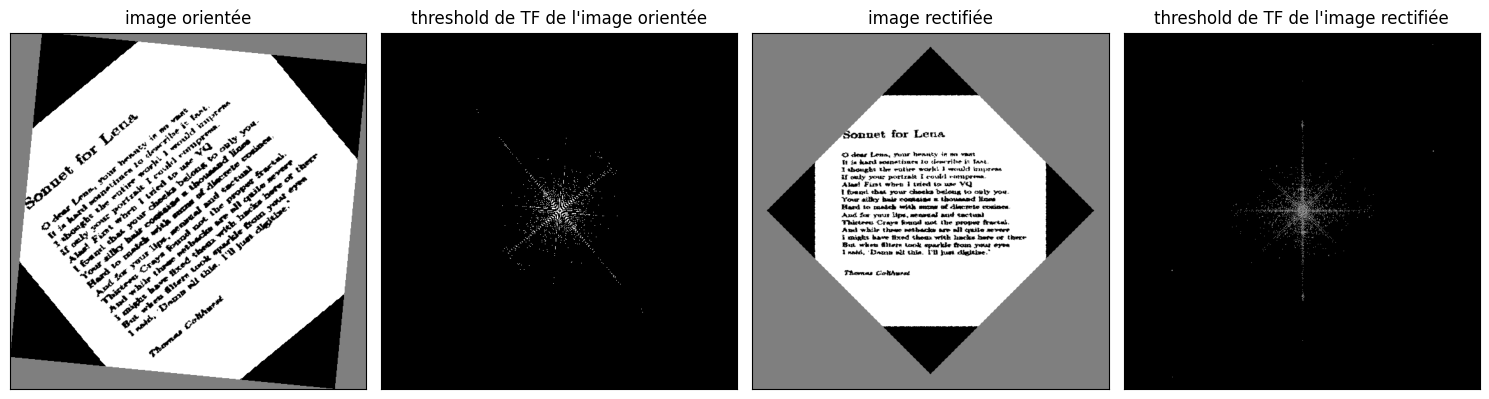

In [24]:
affiche(sonrot, mainOrientation(sonrot)[1])

degré de rotation choisi : 20
angle de correction : 22.5


C:\Users\HP\AppData\Local\Temp\ipykernel_3340\3562645215.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Iori[i-1, j-1] = imax[0]


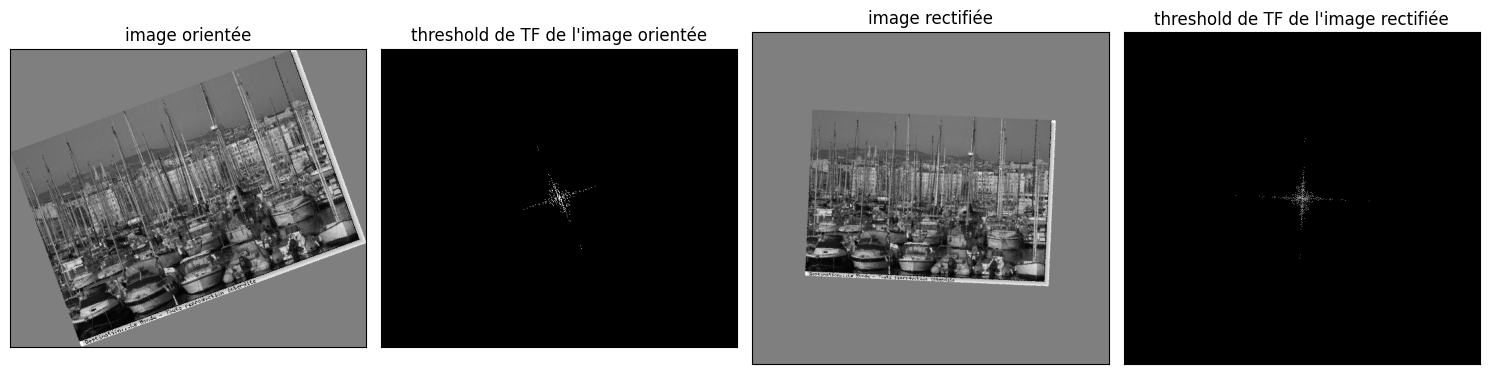

degré de rotation choisi : 45
angle de correction : 45.0


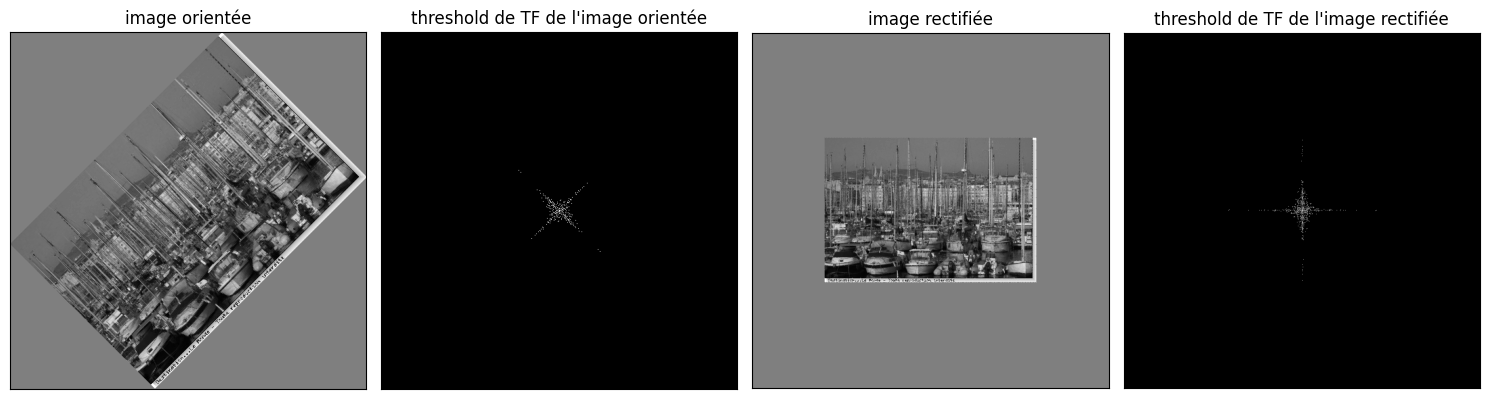

degré de rotation choisi : 55
angle de correction : 50.625


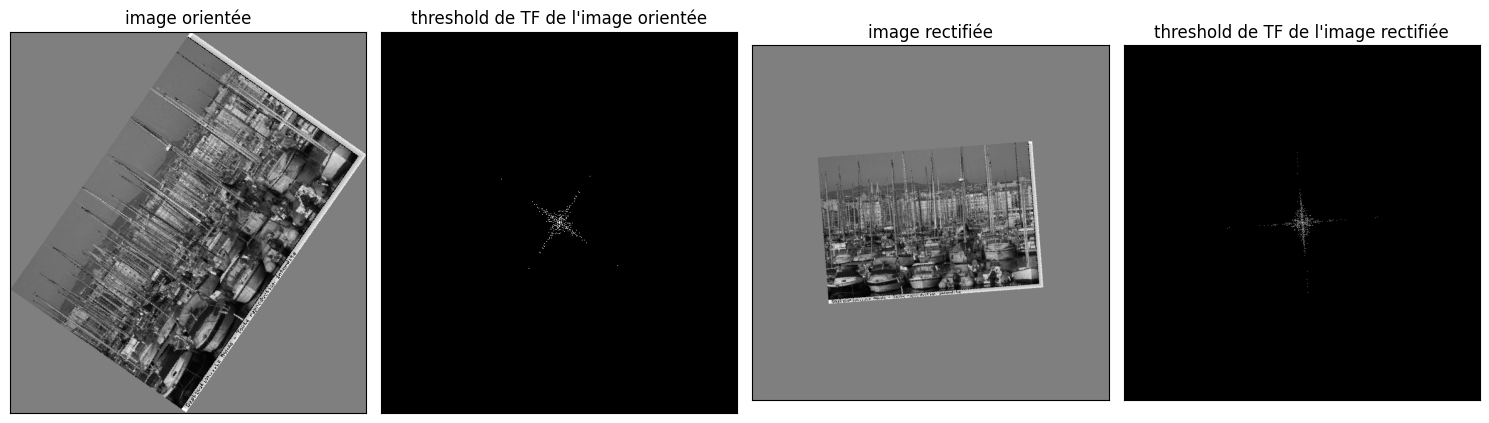

degré de rotation choisi : 75
angle de correction : -11.25


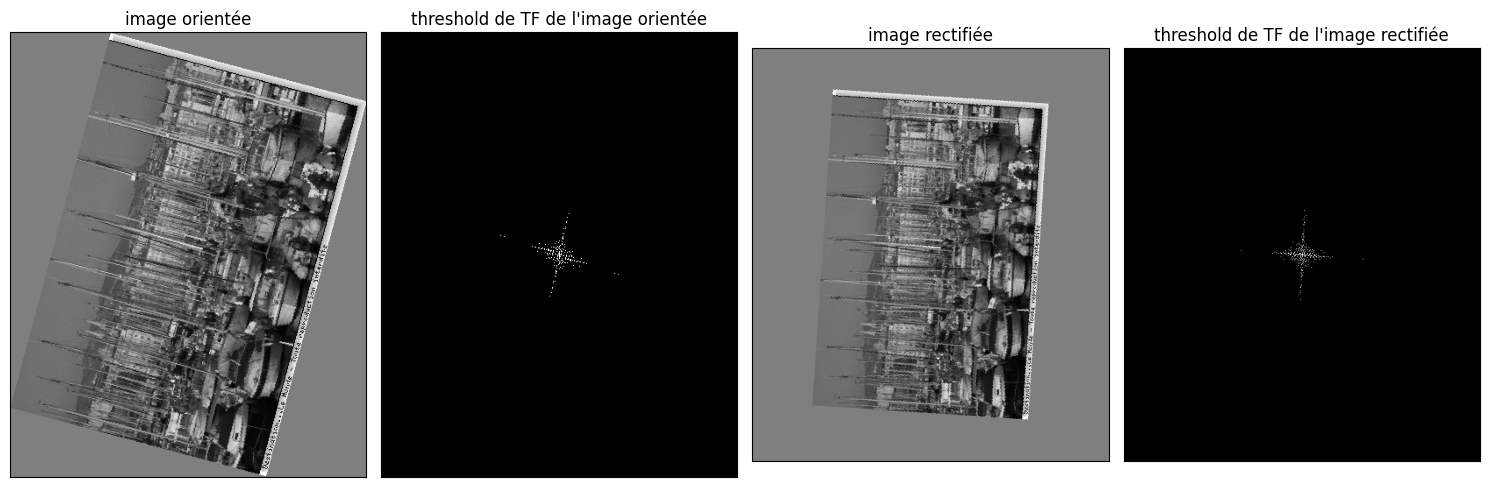

degré de rotation choisi : 90
angle de correction : 84.375


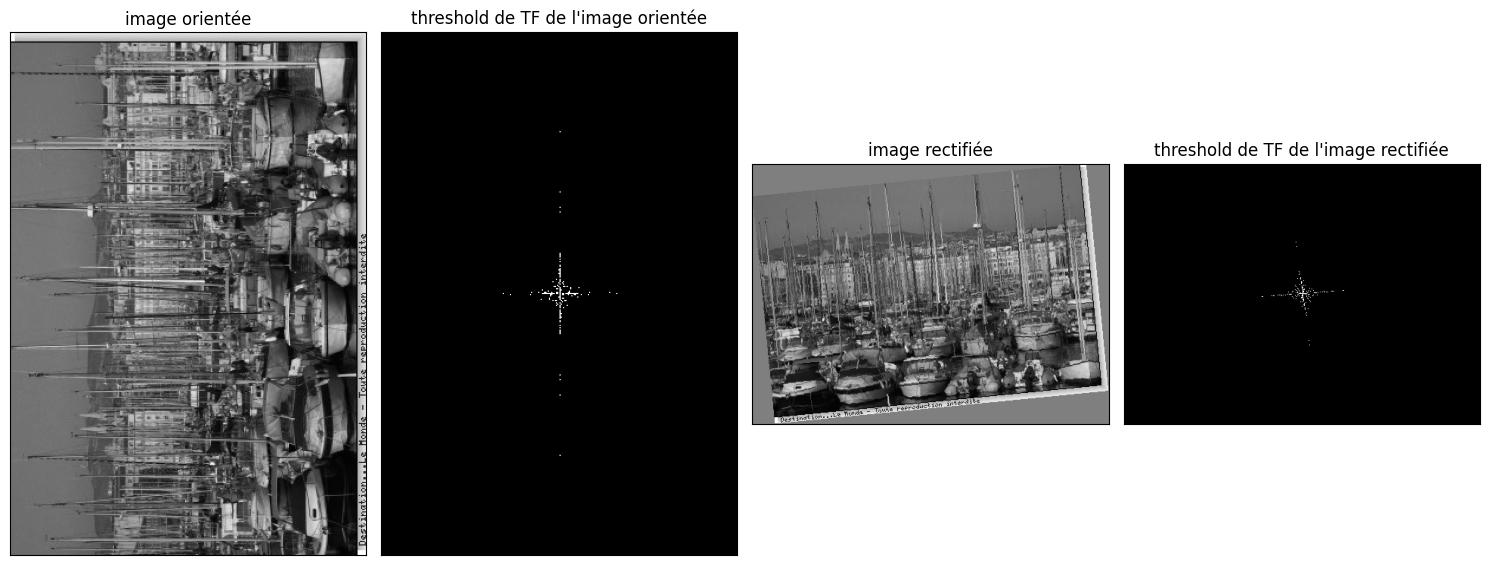

degré de rotation choisi : 180
angle de correction : 84.375


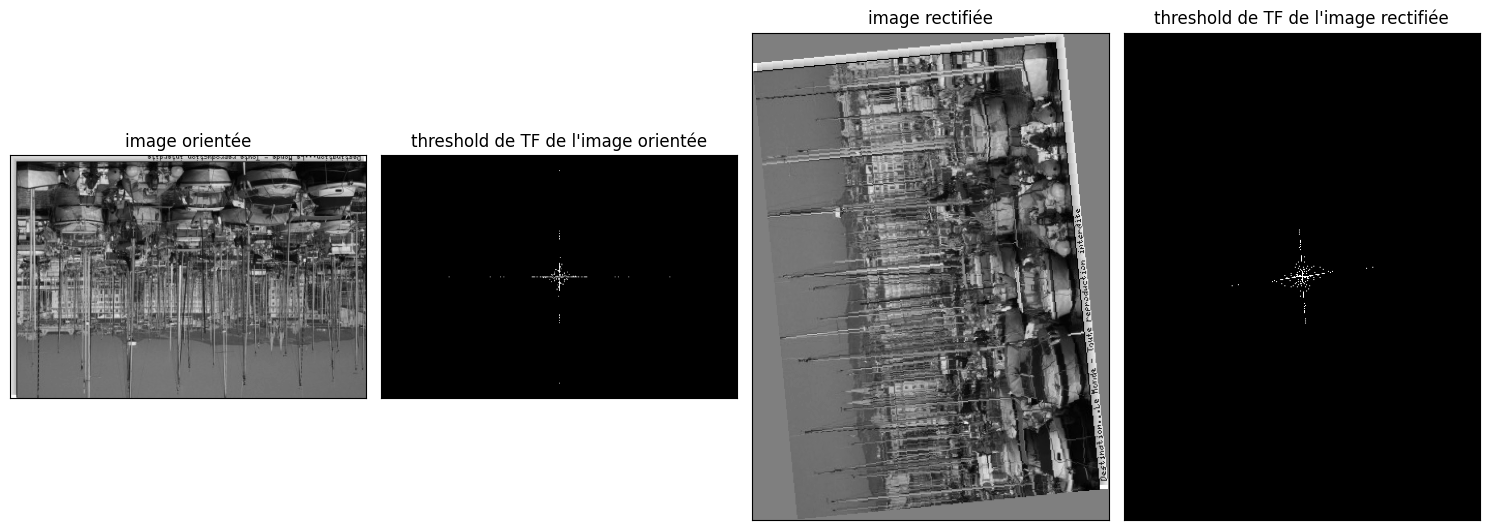

degré de rotation choisi : -90
angle de correction : 84.375


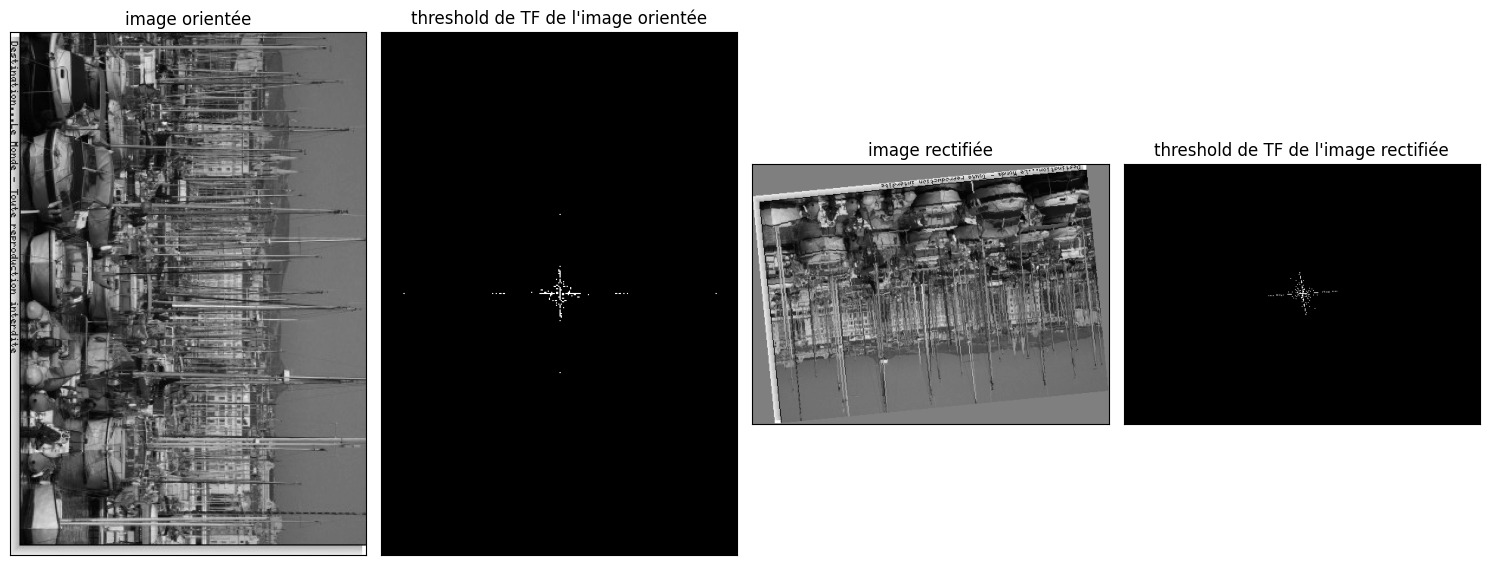

In [25]:
port = np.array(Image.open('img/port.jpg'))

for degre in [20, 45, 55, 75, 90, 180, -90]:
    affiche(port, degre)

# on remarque qu'une rotation dans le domaine spatial entraîne la même rotation dans le domaine fréquentiel, comme discuté dans la question 3.